<a href="https://colab.research.google.com/github/doyoung1122/24-2/blob/Introduction-of-A.I/Intro_AI_regression_linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# Typical way to render matplotlib plots directly within the notebook cells.
# This means that plots will appear right below the code cell that generates them,
# without the need for explicitly calling plt.show().

diabetes (당뇨병) dataset: 442 diabetes patients

Target value: a quantitative measure of disease progression one year after baseline ~ real numbers!



https://www.kaggle.com/code/sgavlickgraham/predicting-diabetes

https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_diabetes.html

In [ ]:
from sklearn.datasets import load_diabetes

diabetes_data = load_diabetes()

In [ ]:
diabetes_data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
print(diabetes_data['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

In [ ]:
diabetes_data['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [ ]:
print(diabetes_data['data'].shape) # n_samples * n_features

(442, 10)


In [ ]:
diabetes_data['data'][0] # row

# Every features are normalized! Z=(X-mu)/sigma

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [ ]:
A=np.array([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [ ]:
A[1,2] # i-1,j-1 component

6

In [ ]:
A[:,1] # all column compoent & 1-1 row

array([2, 5])

In [ ]:
# See values of the first column: (Normalized) age --> We will see this on next topic (Logistic regression)
diabetes_data['data'][:,0]

array([ 0.03807591, -0.00188202,  0.08529891, -0.08906294,  0.00538306,
       -0.09269548, -0.04547248,  0.06350368,  0.04170844, -0.07090025,
       -0.09632802,  0.02717829,  0.01628068,  0.00538306,  0.04534098,
       -0.05273755, -0.00551455,  0.07076875, -0.0382074 , -0.02730979,
       -0.04910502, -0.0854304 , -0.0854304 ,  0.04534098, -0.06363517,
       -0.06726771, -0.10722563, -0.02367725,  0.05260606,  0.06713621,
       -0.06000263, -0.02367725,  0.03444337,  0.03081083,  0.01628068,
        0.04897352,  0.01264814, -0.00914709, -0.00188202, -0.00188202,
        0.00538306, -0.09996055, -0.06000263,  0.01991321,  0.04534098,
        0.02717829, -0.05637009, -0.07816532,  0.06713621, -0.04183994,
        0.03444337,  0.05987114, -0.05273755, -0.00914709, -0.04910502,
       -0.04183994, -0.04183994, -0.02730979,  0.04170844,  0.06350368,
       -0.07090025, -0.04183994, -0.02730979, -0.03457486,  0.06713621,
       -0.04547248, -0.00914709,  0.04170844,  0.03807591,  0.01

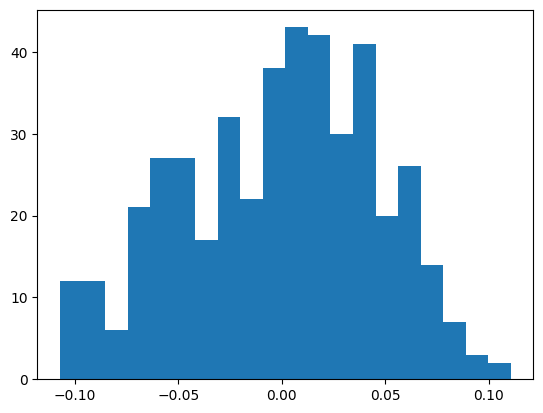

In [ ]:
plt.hist(diabetes_data['data'][:,0], bins=20)
plt.show()

In [ ]:
print(diabetes_data['target'][:10]) ## Check target value = (real) numbers  --> regression problem

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [ ]:
print(diabetes_data['feature_names'])


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


$y=w_1 x_1 + \cdots w_{10} x_{10} +b$
$=(w_1, \cdots, w_{10}, b) \cdot (x_1, \cdots, x_{10}, 1)$

In [ ]:
X = diabetes_data['data']
X = np.concatenate([X,np.ones((X.shape[0],1))], axis=1) #Artificial column for bias
y = diabetes_data['target']

In [ ]:
X[:10]

array([[ 3.80759064e-02,  5.06801187e-02,  6.16962065e-02,
         2.18723855e-02, -4.42234984e-02, -3.48207628e-02,
        -4.34008457e-02, -2.59226200e-03,  1.99074862e-02,
        -1.76461252e-02,  1.00000000e+00],
       [-1.88201653e-03, -4.46416365e-02, -5.14740612e-02,
        -2.63275281e-02, -8.44872411e-03, -1.91633397e-02,
         7.44115641e-02, -3.94933829e-02, -6.83315471e-02,
        -9.22040496e-02,  1.00000000e+00],
       [ 8.52989063e-02,  5.06801187e-02,  4.44512133e-02,
        -5.67042229e-03, -4.55994513e-02, -3.41944659e-02,
        -3.23559322e-02, -2.59226200e-03,  2.86130929e-03,
        -2.59303390e-02,  1.00000000e+00],
       [-8.90629394e-02, -4.46416365e-02, -1.15950145e-02,
        -3.66560811e-02,  1.21905688e-02,  2.49905934e-02,
        -3.60375700e-02,  3.43088589e-02,  2.26877450e-02,
        -9.36191133e-03,  1.00000000e+00],
       [ 5.38306037e-03, -4.46416365e-02, -3.63846922e-02,
         2.18723855e-02,  3.93485161e-03,  1.55961395e-02,
  

In [ ]:
np.random.seed(20241126)
weights = np.random.randn(11) # Generate initial weights w1~w10 and bias b

In [ ]:
weights

In [ ]:
np.sum(weights * X, axis=1) # w1x1+...+w10x10+b

In [ ]:
def L2_loss(weights):
    l1 = y-np.sum(weights * X, axis=1)
    l2 = l1**2
    L2_loss = np.sum(l2)/len(l2) # or, np.mean(l2)
    return L2_loss
print(L2_loss(weights))

In [ ]:
epsilon = 1e-7

In [ ]:
# Here is a straightforward approach to calculate the gradient of L2loss

w1_grad = (L2_loss(weights + np.array([epsilon,0,0,0,0,0,0,0,0,0,0]))-L2_loss(weights))/epsilon

In [ ]:
w2_grad = (L2_loss(weights + np.array([0,epsilon,0,0,0,0,0,0,0,0,0]))-L2_loss(weights))/epsilon
w3_grad = (L2_loss(weights + np.array([0,0,epsilon,0,0,0,0,0,0,0,0]))-L2_loss(weights))/epsilon
w4_grad = (L2_loss(weights + np.array([0,0,0,epsilon,0,0,0,0,0,0,0]))-L2_loss(weights))/epsilon
w5_grad = (L2_loss(weights + np.array([0,0,0,0,epsilon,0,0,0,0,0,0]))-L2_loss(weights))/epsilon
w6_grad = (L2_loss(weights + np.array([0,0,0,0,0,epsilon,0,0,0,0,0]))-L2_loss(weights))/epsilon
w7_grad = (L2_loss(weights + np.array([0,0,0,0,0,0,epsilon,0,0,0,0]))-L2_loss(weights))/epsilon
w8_grad = (L2_loss(weights + np.array([0,0,0,0,0,0,0,epsilon,0,0,0]))-L2_loss(weights))/epsilon
w9_grad = (L2_loss(weights + np.array([0,0,0,0,0,0,0,0,epsilon,0,0]))-L2_loss(weights))/epsilon
w10_grad = (L2_loss(weights + np.array([0,0,0,0,0,0,0,0,0,epsilon,0]))-L2_loss(weights))/epsilon
b_grad = (L2_loss(weights + np.array([0,0,0,0,0,0,0,0,0,0,epsilon]))-L2_loss(weights))/epsilon

In [ ]:
[w1_grad, w2_grad, w3_grad, b_grad]

In [ ]:
#simple way

grads = []
num_params = 11

for i in range(num_params):
    perturbation = np.zeros(num_params)
    perturbation[i] = epsilon
    grad = (L2_loss(weights + perturbation) - L2_loss(weights)) / epsilon
    grads.append(grad)

grads = np.array(grads)

In [ ]:
grads

In [ ]:
eta = 1e-2 # step size (or learning rate) for the gradient descent

weights_new = weights - eta * grads
weights = weights_new

print(L2_loss(weights))

In [ ]:
for i in range(100000):
  grads = []
  num_params = 11

  for i in range(num_params):
      perturbation = np.zeros(num_params)
      perturbation[i] = epsilon
      grad = (L2_loss(weights + perturbation) - L2_loss(weights)) / epsilon
      grads.append(grad)

  grads = np.array(grads)

  weights_new = weights - eta * grads

  weights = weights_new

  if i % 1000 == 0:
    print(L2_loss(weights))
  #print(mu_new, sigma_new)

In [ ]:
plt.scatter(y, np.sum(weights * X, axis=1))
plt.plot([min(y), max(y)], [min(y), max(y)], color = 'r')
plt.show()

Q: How can we evaluate

A: Separate (X,y) into train and test dataset!